<a href="https://colab.research.google.com/github/sriakhil2000/Malaria-Disease-Detection/blob/master/Malaria_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [31]:
cd /content/drive/My Drive/Dataset


/content/drive/My Drive/Dataset


In [32]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [33]:
VGG = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [34]:
for layer in VGG.layers:
    layer.trainable = False


In [35]:
folders = glob('/content/drive/My Drive/Dataset/Train/*')

In [36]:
folders

['/content/drive/My Drive/Dataset/Train/Parasite',
 '/content/drive/My Drive/Dataset/Train/Uninfected']

In [37]:
x = Flatten()(VGG.output)

In [38]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG.input, outputs=prediction)

In [39]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [40]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [42]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [43]:
training_set

In [44]:

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

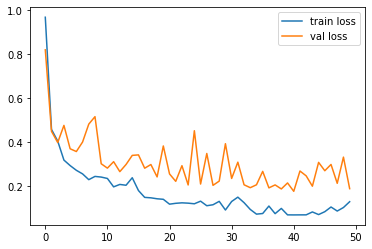

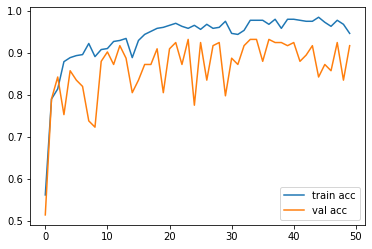

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/My Drive/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_114.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")